In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")

In [2]:
import torchChar
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid, save_image

../src\torchChar\prepare_data.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
ckpt_path = torchChar.get_models_dir() / "alice_v7/checkpoints/epoch=2.ckpt"
model = torchChar.AliceModel.load_from_checkpoint(ckpt_path)
model

AliceModel(
  (conv1): Conv2d(1, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(50, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(100, 200, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=51200, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=200, bias=True)
  (fc_radicals): Linear(in_features=500, out_features=215, bias=True)
  (fc_consonants): Linear(in_features=200, out_features=23, bias=True)
  (fc_vowels): Linear(in_features=200, out_features=40, bias=True)
  (fc_tones): Linear(in_features=200, out_features=6, bias=True)
)

In [11]:
layer_name = 'conv3'

In [12]:
filter_vis = torchChar.visualize_neuron(model, layer_name)

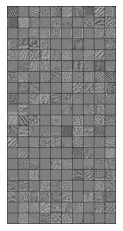

In [13]:
Ximg = make_grid(filter_vis, nrow=10, normalize=True).detach().numpy()
plt.imshow(np.transpose(Ximg, (1,2,0)))
plt.axis('off')
out_dir = torchChar.get_data_dir() / "filter_visualize/"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / f"alice_v7_{layer_name}.png"
save_image(filter_vis, str(out_path), nrow=10, normalize=True)